In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N_SAMPLES = 200
lambda_ = np.linspace(-5,5,num=N_SAMPLES)
t = (lambda_-min(lambda_))/(max(lambda_)-min(lambda_))

def gaussian(mu,sig):
    scale = 1/(np.sqrt(2*np.pi)*sig)
    return scale*np.exp(-np.power(lambda_ - mu, 2.) / (2 * np.power(sig, 2.)))

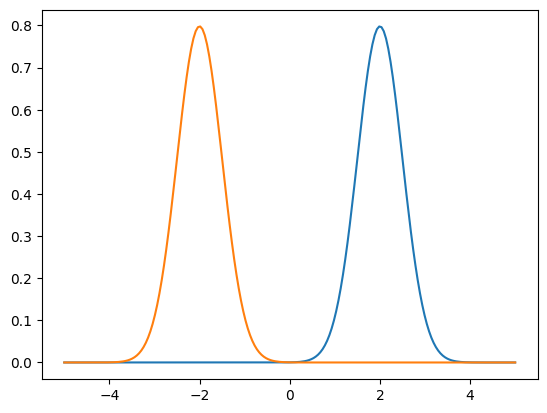

In [4]:
fig, ax = plt.subplots()
f_ref = gaussian(2,0.5)
f_query = gaussian(-2,0.5)
ax.plot(lambda_, f_ref)
ax.plot(lambda_, f_query)
plt.show()

### Using PyTorch version

In [5]:
from apdist.torch import TorchAmplitudePhaseDistance as torch_apdist 
import torch 

optim_kwargs = {"n_iters":100, 
                "n_basis":20, 
                "n_layers":15,
                "n_restarts":128,
                "domain_type":"linear",
                "basis_type":"palais",
                "lr":1e-1,
                "n_domain":N_SAMPLES,
                "eps":1e-1,
                "verbose" : True
            }
amplitude, phase, output = torch_apdist(torch.from_numpy(t), # all the inputs should be torch.Tensor
                                        torch.from_numpy(f_ref), 
                                        torch.from_numpy(f_query), 
                                        **optim_kwargs
                                    )
print("Amplitude : %2.4f, Phase : %2.4f"%(amplitude, phase))

Error threhsold reached74e-03 at iteration 58 of 128
Amplitude : 0.0733, Phase : 0.6443


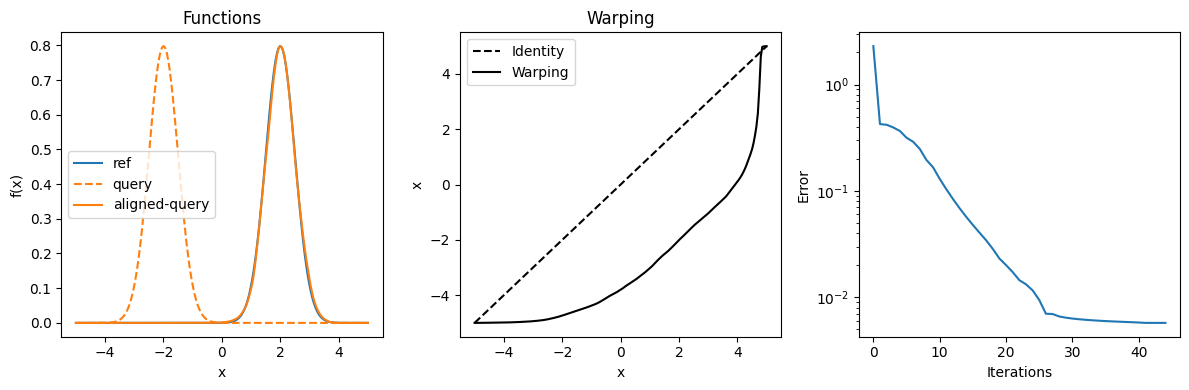

In [9]:
from apdist.torch import plot_warping as plot_warping_torch

plot_warping_torch(lambda_, f_ref, f_query, output)

### Using Numpy version

In [7]:
from apdist.distances import AmplitudePhaseDistance as dist

optim_kwargs = {"optim":"DP", "grid_dim":5}
amplitude, phase = dist(t, f_ref, f_query, **optim_kwargs)
print("Amplitude : %2.4f, Phase : %2.4f"%(amplitude, phase))

Amplitude : 0.0555, Phase : 0.5540


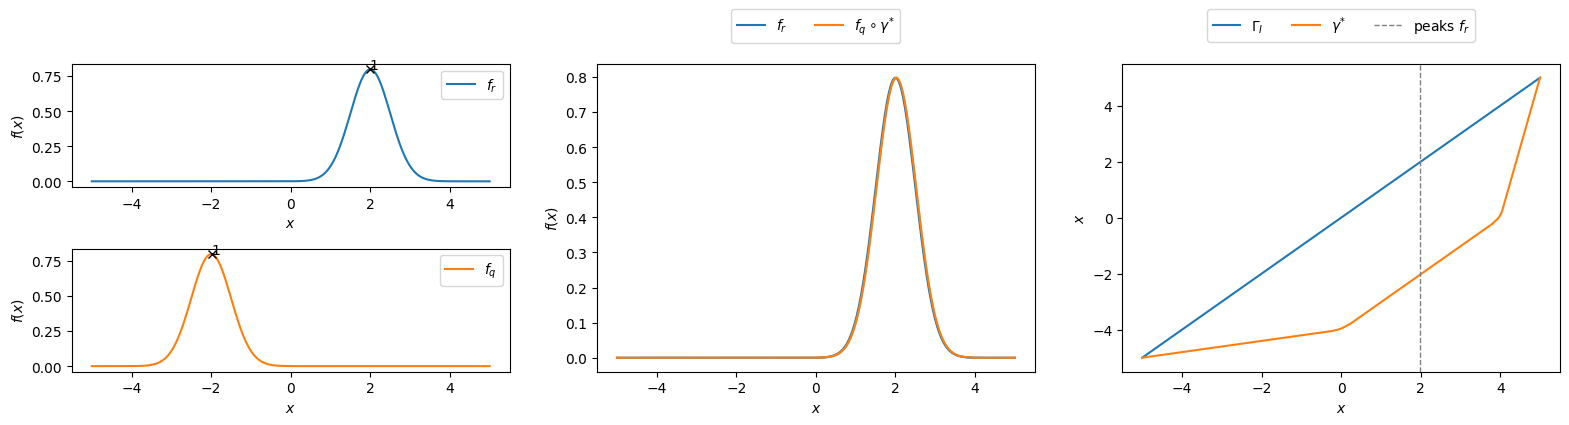

In [8]:
# Plot warped functions and gamma 
from apdist.utils import plot_warping 
from apdist.geometry import SquareRootSlopeFramework as SRSF

# for SRSF representation, we map the domain into [0,1]
srsf = SRSF(t)
q_ref = srsf.to_srsf(f_ref)
q_query = srsf.to_srsf(f_query)
gamma = srsf.get_gamma(q_ref, q_query, **optim_kwargs)
f_query_gamma = srsf.warp_f_gamma(f_query, gamma)
plot_warping(lambda_, f_ref, f_query, f_query_gamma, gamma)
plt.show()